(140, 5) (60, 5)
k | Custom Accuracy | Sklearn Accuracy
-----------------------------------
1 | 0.833 | 0.833
5 | 0.883 | 0.883
15 | 0.867 | 0.867


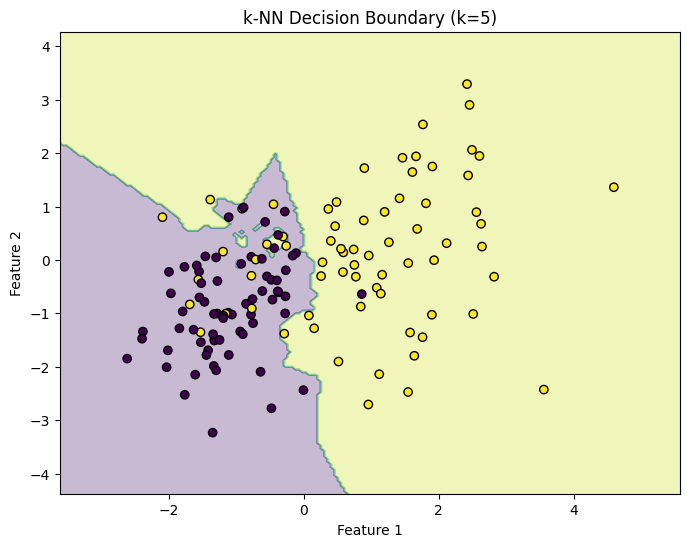

In [1]:
#Libraries
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, precision_score, recall_score

#1.Generate a synthetic bianry classification dataset with 5 features and 200 samples using sklearn.datasets.make_classification.
#Split the data into training (70%)and testing(30%) sets.
X,y=make_classification(
    n_samples=200,
    n_features=5,
    n_informative=3,
    n_redundant=0,
    n_classes=2,
    random_state=42
)
df=pd.DataFrame(X,columns=["feature_1","feature_2","feature_3","feature_4","feature_5"])
df["target"]=y
df.head()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

#2.Implement the k_NN classifier class from scratch using Numpy.This implementation must include methods for calculating Euclidean distance, 
#finding the k nearest neighbors and performing majority voting for prediction.

print(X_train.shape, X_test.shape)
class KNNFromScratch:
    def __init__(self,k=3):
        self.k=k
    def fit(self,X,y):
        self.X_train=X
        self.y_train=y
    def _euclidean_distance(self,x1,x2):
        return np.sqrt(np.sum((x1-x2)**2))
    def predict(self,X):
        predictions=[]
        for x in X:
            distances=[
                self._euclidean_distance(x,x_train)
                for x_train in self.X_train
            ]
            k_indices = np.argsort(distances)[:self.k]
            k_labels=self.y_train[k_indices]
            prediction = np.bincount(k_labels).argmax()
            predictions.append(prediction)
        return np.array(predictions)

#3.train your custom k-NN model on the training set for three different values of k(eg.,k=1,k=5,k=15).
#Evaluate the performance(accuracy,precision,recall) of each model on the test set.

k_values=[1,5,15]
results_custom={}
for k in k_values:
    knn=KNNFromScratch(k=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)

    results_custom[k]={
        "accuracy":accuracy_score(y_test,y_pred),
        "precision":precision_score(y_test,y_pred),
        "recall":recall_score(y_test,y_pred)
    }
results_custom  

results_sklearn={}

for k in k_values:
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    results_sklearn[k]={
        "accuracy":accuracy_score(y_test,y_pred),
        "precision":precision_score(y_test,y_pred),
        "recall":recall_score(y_test,y_pred)
    }
results_sklearn


#Implement the same evaluation using scikit-learn's kNeighborsClassifier for comparison.
#Report the metrics from both your custom model and the scikit-learn model side-by-side for the optimal k found.
print("k | Custom Accuracy | Sklearn Accuracy")
print("-"*35)
for k in k_values:
    print(
        f"{k} | "
        f"{results_custom[k]['accuracy']:.3f} | "
        f"{results_sklearn[k]['accuracy']:.3f}"
    )

#For a simplified version of your dataset (using only the first two features), generate a mesh grid and plot the resulting decision boundary created 
#by your best-performing k-NN implementation.
X_2d=X[:,:2]
X_train_2d,X_test_2d,y_train_2d,y_test_2d=train_test_split(
    X_2d,y,test_size=0.3,random_state=42
)
best_k=max(results_custom,key=lambda k:results_custom[k]["accuracy"])
knn_best=KNNFromScratch(k=best_k)
knn_best.fit(X_train_2d,y_train_2d)

x_min,x_max=X_2d[:,0].min()-1,X_2d[:,0].max()+1
y_min,y_max=X_2d[:,1].min()-1,X_2d[:,1].max()+1

xx,yy=np.meshgrid(
    np.arange(x_min,x_max,0.05),
    np.arange(y_min,y_max,0.05)
)
grid_points = np.c_[xx.ravel(),yy.ravel()]
z=knn_best.predict(grid_points)
z=z.reshape(xx.shape)

#Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train_2d, edgecolors="k")
plt.title(f"k-NN Decision Boundary (k={best_k})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()